In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

In [43]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images,mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [30]:
trX = trX.reshape(-1,28,28,1)
teX = teX.reshape(-1,28,28,1)
X = tf.placeholder(tf.float32,[None,28,28,1])
y = tf.placeholder(tf.float32,[None,10] )
keep_hidden = tf.placeholder(dtype=tf.float32)

# Conv1
kernel_1 = tf.Variable(tf.truncated_normal([3,3,1,32],dtype=tf.float32,stddev=1e-1))
conv_1 = tf.nn.conv2d(X,kernel_1,[1,1,1,1],padding='SAME')
biases_1 = tf.Variable(tf.constant(0.0,shape=[32],dtype=tf.float32))
bais_1 = tf.nn.bias_add(conv_1,biases_1)
C1 = tf.nn.relu(bais_1)   # 28*28*32
# pool1
pool1 = tf.nn.max_pool(C1,[1,2,2,1],[1,2,2,1],padding='SAME') #最大值池化，14*14*32
# Conv2
kernel_2 = tf.Variable(tf.truncated_normal([3,3,32,64],dtype=tf.float32,stddev=1e-1))
conv_2 = tf.nn.conv2d(pool1,kernel_2,[1,1,1,1],padding='SAME')
biases_2 = tf.Variable(tf.constant(0.0,shape=[64],dtype=tf.float32))
bais_2 = tf.nn.bias_add(conv_2,biases_2)
C2 = tf.nn.relu(bais_2)
# pool2
pool2 = tf.nn.max_pool(C1,[1,2,2,1],[1,2,2,1],padding='SAME') #最大值池化，7*7*64()


# 扁平化
in_fc = tf.reshape(pool2,[-1,7*7*64*2])  # ??????? 为啥*2？不然怎么是256*10？ 不是128*10？
# dropout
in_fc = tf.nn.dropout(in_fc,keep_hidden)

# Fc3
weights = tf.Variable(tf.truncated_normal([7*7*64*2,10],dtype=tf.float32,stddev=1e-1))
biases_3 = tf.Variable(tf.constant(0.0,shape=[10],dtype=tf.float32))
F = tf.nn.xw_plus_b(in_fc,weights,biases_3)
# softmax
#F = tf.nn.softmax(F)

# loss function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=F))

# optimizer
# 1.SGD
#optim_1 = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
# 2.Adam
optim_1 = tf.train.AdamOptimizer().minimize(loss)
# 3.
# optim_3 = tf.train.AdadeltaOptimizer().minimize(loss)
# predict value
predict = tf.argmax(F,1) # axis

In [31]:
#train
batch_size = 128
test_size = 256
init = tf.global_variables_initializer()   
with tf.Session() as sess:
    sess.run(init)
    for i in range(10):
        training_batch = zip(range(0, len(trX), batch_size),
                             range(batch_size, len(trX)+1, batch_size))
        for start, end in training_batch:
            sess.run(optim_1, feed_dict={X: trX[start:end], y: trY[start:end], keep_hidden: 0.5})
        
        test_indices = np.arange(len(teX))
        np.random.shuffle(test_indices) # 打乱顺序函数
        test_indices = test_indices[0:test_size]
        print(i, np.mean(np.argmax(teY[test_indices], axis=1) ==
                         sess.run(predict,feed_dict={X: teX[test_indices],
                                                        keep_hidden: 1.0})))
        

0 0.9609375
1 0.984375
2 0.9765625
3 0.984375
4 0.96875
5 0.984375
6 0.984375
7 0.9765625
8 0.97265625
9 0.984375


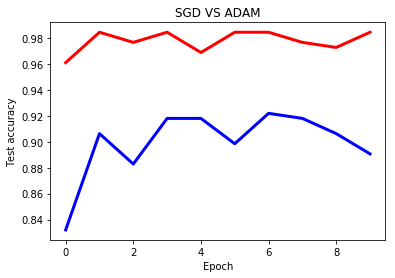

In [34]:
x1 = [0.83203125,0.90625,0.8828125,0.91796875,0.91796875,0.8984375,0.921875,0.91796875,0.90625,0.890625]
x2 = [0.9609375,0.984375,0.9765625,0.984375,0.96875,0.984375,0.984375,0.9765625,0.97265625,0.984375]
plt.figure()
plt.plot(range(10),x1,color='b',lw=3)
plt.plot(range(10),x2,color='r',lw=3)
plt.title('SGD VS ADAM')
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
plt.show()

In [38]:
trX.shape

(55000, 28, 28, 1)